## Redes Convolucionales
#### Ejemplo clasificación de perros y gatos para CAPTCHA

Este notebook utiliza datos de la [competición de Kaggle Dogs vs. Cats](https://www.kaggle.com/c/dogs-vs-cats/overview). En esta competicion se utiliza Asirra (Animal Species Image Recognition for Restricting Access), CAPTCHA que sirve para diferenciar entre una persona o una máquina accediendo a una página web. Este tipo de "pruebas" se utilizan para evitar emails de spam, y ataques por fuerza bruta contra servidores.

En este notebook vamos a probar que hay técnicas de clasificado automáticas de imágenes mediante redes neuronales, que con las que se intenta saltar CAPTCHA

# Import Library

# Define Constants
Tendremos una serie de constantes como las dimensiones de las imágenes, que serán fijas a lo largo de todo el notebook

# Prepare Training Data
1. Descárgate el dataset de train de [la competición de Kaggle](https://www.kaggle.com/c/dogs-vs-cats/overview).
2. Descomprime el dataset y guardalo en la ruta que quieras del ordenador. Por supuesto, NO en la carpeta donde esté el repositorio
3. En este punto vamos guardar en una lista las etiquetas de cada foto.

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0
...,...,...
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1


### See Total In count

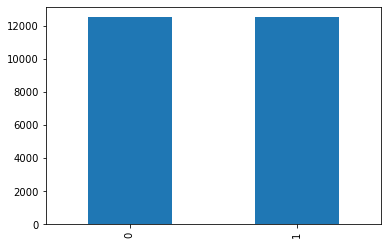

# See sample image

(447, 294, 3)
255


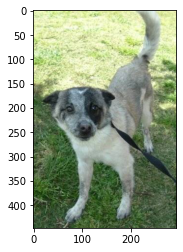

Una imagen no es mas que un array de HxWxC píxeles, siendo H(Height) y W(Width) las dimensiones de resolución de la imagen, y C el número de canales. Habrá tres valores por píxel. 

array([[[245, 255, 198],
        [250, 255, 203],
        [251, 255, 204],
        ...,
        [250, 251, 191],
        [251, 252, 192],
        [248, 249, 189]],

       [[239, 250, 192],
        [245, 255, 198],
        [250, 255, 203],
        ...,
        [240, 241, 181],
        [242, 243, 183],
        [241, 242, 182]],

       [[247, 255, 200],
        [245, 255, 198],
        [239, 250, 192],
        ...,
        [240, 241, 181],
        [242, 243, 183],
        [241, 242, 182]],

       ...,

       [[ 51,  91,  54],
        [ 52,  90,  53],
        [ 52,  90,  53],
        ...,
        [ 80, 103,  75],
        [ 88, 111,  83],
        [ 70,  93,  65]],

       [[ 32,  72,  35],
        [ 29,  69,  32],
        [ 27,  67,  30],
        ...,
        [ 68,  93,  64],
        [ 63,  88,  59],
        [ 57,  82,  53]],

       [[ 54,  94,  57],
        [ 48,  88,  51],
        [ 44,  84,  47],
        ...,
        [ 91, 117,  90],
        [ 69,  95,  68],
        [ 49,  75,  48]]

# Resize image
Cargar todas las imágenes a la vez es un problema ya que son un total de 25000 (unos 500MB la carpeta de train). Este proceso require mucha memoria, por lo que tendremos que aplicarle un resize a cada imagen para bajarlas de resolución. Esto también nos sirve para solventar el problema de tener imágenes con distintas resoluciones.

Tamaño imagen original: (323, 343, 3)
Tamaño imagen reshape: (75, 75, 3)
Maximo valor por pixel: 255


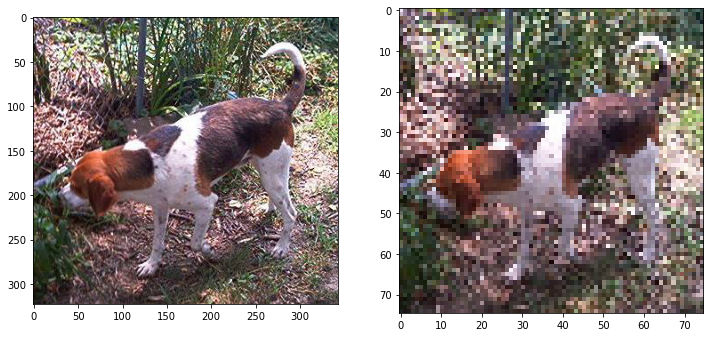

# Color
Podríamos cargar las imágenes como blanco y negro, de esta forma se reduciría el espacio de features considerablemente al contar con un único canal

Dimensiones: (239, 196)
Maximo color: 255


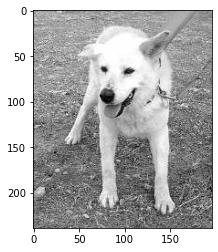

# Load data
Llega el momento de cargar los datos. Ya no estan sencillo como cuando teníamos datasets en CSVs puesto que ahora hay que cargar miles de archivos en memoria en este notebook. Para ello necesitaremos un programa iterativo que vaya recorriendo los archivos de la carpeta, cargarlos como array de numpy y almacenarlos en un objeto.

array(['cat.2502.jpg', 'dog.9048.jpg', 'cat.8343.jpg', 'dog.11725.jpg',
       'cat.5130.jpg', 'cat.4304.jpg', 'dog.7203.jpg', 'cat.12361.jpg',
       'cat.10500.jpg', 'dog.8121.jpg'], dtype='<U13')

(1000, 75, 75, 3)
(250, 75, 75, 3)


(75, 75, 3)


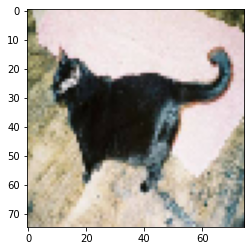

array([[[ 89,  95,  51],
        [132, 132,  98],
        [201, 197, 190],
        ...,
        [ 65,  67,  45],
        [ 58,  63,  37],
        [ 51,  55,  37]],

       [[127, 131,  87],
        [109, 108,  67],
        [208, 203, 199],
        ...,
        [ 54,  58,  35],
        [ 62,  67,  36],
        [ 51,  55,  20]],

       [[110, 112,  65],
        [151, 148, 101],
        [202, 199, 182],
        ...,
        [ 38,  48,  24],
        [ 88,  91,  57],
        [143, 142,  96]],

       ...,

       [[157, 152, 132],
        [160, 155, 132],
        [167, 156, 128],
        ...,
        [107, 121, 114],
        [100, 122, 120],
        [ 80, 102, 100]],

       [[138, 133, 113],
        [175, 170, 150],
        [184, 173, 151],
        ...,
        [ 94, 111, 108],
        [ 81, 102, 102],
        [ 42,  57,  60]],

       [[156, 151, 129],
        [187, 181, 166],
        [173, 165, 146],
        ...,
        [ 85, 105, 107],
        [ 62,  81,  82],
        [ 35,  46,  53]]

# Normalized data
Normalizar los datos hará que entrene mucho mejor la red, al estar todos los pixeles en la misma escala.

Min: 0
Max: 255


Min: 0.0
Max: 1.0


# Shuffle data
Como hemos cargado los datos de manera ordenada (primero gatos y luego perros), tendremos que desordenarlos para asegurarnos de que no haya ningún sesgo en el entrenamiento ni en la selección de datos de validación.

# Save data
Podemos guardar los arrays de numpy en un archivo `.npz`, de tal manera que luego sea más rápido importarlo

Para cargar

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Conv Layer**: extraerá diferentes features de las imagenes
* **Pooling Layer**: Reduce las dimensiones de las imágenes tras una capa convolucional
* **Fully Connected Layer**: Tras las capas convolucionales, aplanamos las features y las introducimos como entrada de una red neuronal normal.
* **Output Layer**: Las predicciones de la red

Para el loss y la metrica, se puede usar un binary_crossentropy, al ser un target binario. O 

'2.9.0'

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

Epoch 1/20
80/80 [==============================] - 12s 127ms/step - loss: 0.7075 - accuracy: 0.5188 - val_loss: 0.6927 - val_accuracy: 0.5600
Epoch 2/20
80/80 [==============================] - 11s 143ms/step - loss: 0.6937 - accuracy: 0.5150 - val_loss: 0.6913 - val_accuracy: 0.5350
Epoch 3/20
80/80 [==============================] - 11s 134ms/step - loss: 0.6917 - accuracy: 0.5275 - val_loss: 0.6830 - val_accuracy: 0.5350
Epoch 4/20
80/80 [==============================] - 10s 128ms/step - loss: 0.6884 - accuracy: 0.5325 - val_loss: 0.6867 - val_accuracy: 0.5950
Epoch 5/20
80/80 [==============================] - 11s 134ms/step - loss: 0.6814 - accuracy: 0.5675 - val_loss: 0.6830 - val_accuracy: 0.5400
Epoch 6/20
80/80 [==============================] - 10s 130ms/step - loss: 0.6765 - accuracy: 0.5688 - val_loss: 0.6667 - val_accuracy: 0.6550
Epoch 7/20
80/80 [==============================] - 11s 139ms/step - loss: 0.6725 - accuracy: 0.5938 - val_loss: 0.6650 - val_accuracy: 0.5550

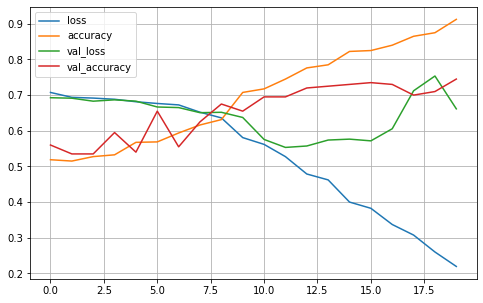

8/8 [==============================] - 1s 82ms/step - loss: 0.7920 - accuracy: 0.6880
test loss, test accuracy [0.7920045852661133, 0.6880000233650208]


{0, 1}

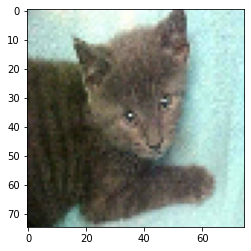

1/1 [==============================] - 0s 272ms/step


array([[0.02359455]], dtype=float32)

(75, 75, 3)

(1, 75, 75, 3)

1/1 [==============================] - 0s 51ms/step


array([[0.02359455]], dtype=float32)

Categorias: ['cat' 'dog']


,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [32]:
df.head()

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


Found 24750 validated image filenames belonging to 2 classes.


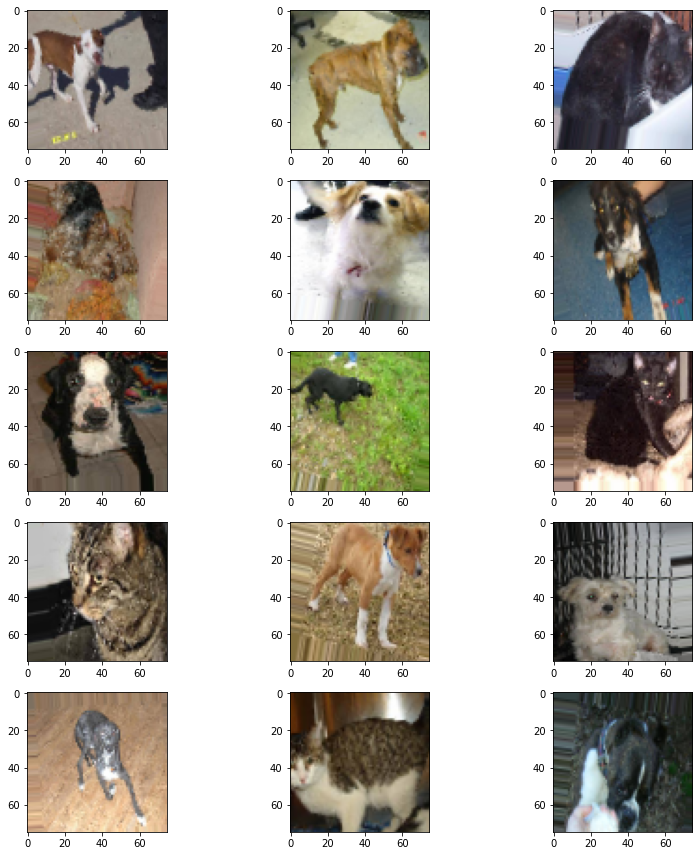

Shape train 19500
Shape validation 5500


In [37]:
train_df.head()

,filename,category
0,cat.493.jpg,cat
1,dog.9112.jpg,dog
2,cat.745.jpg,cat
3,dog.11022.jpg,dog
4,dog.11363.jpg,dog


cat    9801
dog    9699
Name: category, dtype: int64

dog    2801
cat    2699
Name: category, dtype: int64

Found 19500 validated image filenames belonging to 2 classes.


Found 5500 validated image filenames belonging to 2 classes.


Epoch 1/12
1950/1950 [==============================] - 388s 198ms/step - loss: 0.6175 - accuracy: 0.6625 - val_loss: 0.4987 - val_accuracy: 0.7669
Epoch 2/12
1950/1950 [==============================] - 340s 174ms/step - loss: 0.5614 - accuracy: 0.7134 - val_loss: 0.4821 - val_accuracy: 0.7742
Epoch 3/12
1950/1950 [==============================] - 329s 169ms/step - loss: 0.5381 - accuracy: 0.7312 - val_loss: 0.4460 - val_accuracy: 0.7884
Epoch 4/12
1950/1950 [==============================] - 329s 169ms/step - loss: 0.5134 - accuracy: 0.7483 - val_loss: 0.3980 - val_accuracy: 0.8158
Epoch 5/12
 628/1950 [========>.....................] - ETA: 3:29 - loss: 0.4942 - accuracy: 0.7619

In [ ]:
######### fin #########